In [1]:
import pandas as pd

In [2]:
# https://www.kaggle.com/nikdavis/datasets

## interpretation

### setup

In [3]:
from fastai.collab import *

In [4]:
df_shuffle = pd.read_hdf("df_shuffle.h5", "df_shuffle")

In [5]:
data = CollabDataBunch.from_df(
    df_shuffle,
    user_name="username",
    item_name="name",
    rating_name="recommended",
    seed=36,
)

In [6]:
train_dataset = data.train_ds.inner_df

In [7]:
learn = collab_learner(data, n_factors=50)

In [8]:
learn.load("dotprod4")

CollabLearner(data=TabularDataBunch;

Train: LabelList (1388139 items)
x: CollabList
username Grunt95; name House Party; ,username 「Ｂｏｋｕ♥」; name Evoland; ,username Beans; name My Sunny Resort; ,username Styxplorer; name BlazeRush; ,username (YouTube)Dragnix; name Undead Shadows; 
y: FloatList
1.0,0.0,0.0,0.0,0.0
Path: .;

Valid: LabelList (347034 items)
x: CollabList
username Dwigt; name Rivals of Aether; ,username lmao; name The Witcher® 3: Wild Hunt; ,username o}}{{![)3; name GRID 2; ,username unknowncity; name ETHER VAPOR Remaster; ,username BIRDMAN ~ VEGAN FUTURE; name Supraland; 
y: FloatList
1.0,1.0,1.0,0.0,1.0
Path: .;

Test: None, model=EmbeddingDotBias(
  (u_weight): Embedding(36539, 50)
  (i_weight): Embedding(21255, 50)
  (u_bias): Embedding(36539, 1)
  (i_bias): Embedding(21255, 1)
), opt_func=functools.partial(<class 'torch.optim.adam.Adam'>, betas=(0.9, 0.99)), loss_func=FlattenedLoss of MSELoss(), metrics=[], true_wd=True, bn_wd=True, wd=0.01, train_bn=True, path=PosixPa

In [9]:
learn.model

EmbeddingDotBias(
  (u_weight): Embedding(36539, 50)
  (i_weight): Embedding(21255, 50)
  (u_bias): Embedding(36539, 1)
  (i_bias): Embedding(21255, 1)
)

In [10]:
reviews = pd.read_hdf("df_shuffle.h5", "df_shuffle")

In [11]:
games_most_reviews_df = (
    reviews.groupby("name")["recommended"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()[:1000]
)

In [12]:
g = reviews.groupby("name")["recommended"].count()

In [13]:
games_most_reviews = g.sort_values(ascending=False).index.values[:1000] = g.sort_values(
    ascending=False
).index.values[:1000]

In [14]:
games_most_reviews[:10]

array(['ARK: Survival Evolved', 'The Witcher® 3: Wild Hunt', 'Dead by Daylight', 'Arma 3', 'Warframe', 'Dota 2',
       "Sid Meier's Civilization® V", 'The Elder Scrolls V: Skyrim Special Edition', 'Portal', "Garry's Mod"],
      dtype=object)

In [15]:
games_most_reviews_df.head(15)

,name,recommended
0,The Witcher® 3: Wild Hunt,10412.0
1,ARK: Survival Evolved,9346.0
2,Arma 3,8663.0
3,Warframe,7754.0
4,Sid Meier's Civilization® V,7239.0
5,Dead by Daylight,7134.0
6,Dota 2,6529.0
7,Portal,5617.0
8,Garry's Mod,4826.0
9,The Elder Scrolls V: Skyrim Special Edition,4679.0


this shows, how unreliable (in terms of review numbers) was my scraper, because [Counter-Strike: Global Offensive](https://store.steampowered.com/app/730/CounterStrike_Global_Offensive/) has more then 3 000 000  reviews on website.

### games bias

In [22]:
games_bias = learn.bias(games_most_reviews, is_item=True)

In [23]:
reviews.groupby("name")["recommended"].mean().sort_values(ascending=False)

name
The Puppet of Tersa: Episode One    1.0
The Chronicles of Nyanya            1.0
Keyboard Killers                    1.0
Keeplanet                           1.0
Kautic - The Bald Wizard            1.0
                                   ... 
PRO DRIFT RELOADED                  0.0
Escape Station                      0.0
Splotches                           0.0
Beginner'sGame                      0.0
Breath of Warfare                   0.0
Name: recommended, Length: 21831, dtype: float64

In [24]:
mean_recommended = reviews.groupby("name")["recommended"].mean()

 we can zip through (i.e. going through together) each of the movies along with the bias and grab their rating, the bias, and the movie.

In [25]:
games_ratings = [
    (b, i, mean_recommended.loc[i]) for i, b in zip(games_most_reviews, games_bias)
]

In [26]:
# The value of the key parameter should be
# a function that takes a single argument and returns a key to use for sorting purposes.
# to sort by tensors, we need to choose [0] in this case
sorted(games_ratings, key=lambda o: o[0])[:15]

[(tensor(-0.0716), 'Spacebase DF-9', 0.1053639846743295),
 (tensor(-0.0352), "Uriel's Chasm", 0.23529411764705882),
 (tensor(0.0032), 'NBA 2K18', 0.36027713625866054),
 (tensor(0.0156), 'Towns', 0.1913978494623656),
 (tensor(0.0814), 'Voxelized', 0.25616698292220114),
 (tensor(0.0841),
  'Magic 2015 - Duels of the Planeswalkers',
  0.37662337662337664),
 (tensor(0.0865), 'X Rebirth', 0.3756906077348066),
 (tensor(0.1024), 'Edge of Space', 0.32821497120921306),
 (tensor(0.1067), 'Takedown: Red Sabre', 0.32142857142857145),
 (tensor(0.1089), 'Bless Online', 0.31296296296296294),
 (tensor(0.1247), 'Argo', 0.4258160237388724),
 (tensor(0.1296), 'Castle Story', 0.40963855421686746),
 (tensor(0.1318), 'Enemy Front', 0.5434782608695652),
 (tensor(0.1396), 'NBA 2K17', 0.5561643835616439),
 (tensor(0.1424), 'NBA 2K19', 0.44638949671772427)]

In [27]:
sorted(games_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(0.7689), 'Infested Planet', 0.9105367793240556),
 (tensor(0.7580), 'Primordia', 0.9753914988814317),
 (tensor(0.7562), 'Creeper World 3: Arc Eternal', 0.9424603174603174),
 (tensor(0.7529),
  "Defender's Quest: Valley of the Forgotten (DX edition)",
  0.9628318584070796),
 (tensor(0.7527), 'The Room', 0.9657534246575342),
 (tensor(0.7454), 'Hexcells Infinite', 0.9661399548532731),
 (tensor(0.7446), 'DUSK', 0.9716981132075472),
 (tensor(0.7433), 'Infinifactory', 0.9346733668341709),
 (tensor(0.7419), 'GemCraft - Chasing Shadows', 0.9441964285714286),
 (tensor(0.7414), 'West of Loathing', 0.9693140794223827),
 (tensor(0.7396), 'RollerCoaster Tycoon®: Deluxe', 0.9692671394799054),
 (tensor(0.7381), 'The Swapper', 0.9474576271186441),
 (tensor(0.7379), 'Hot Dogs, Horseshoes & Hand Grenades', 0.9552669552669553),
 (tensor(0.7370), 'Downwell', 0.9617428267800212),
 (tensor(0.7356), 'Orcs Must Die!', 0.9526372443487621)]

### games wieghts

In [28]:
game_w = learn.weight(games_most_reviews, is_item=True)

In [29]:
game_w.shape

torch.Size([1000, 50])

### t-sne

In [35]:
from sklearn.manifold import TSNE

In [40]:
games_tsne = manifold.TSNE(n_components=2, perplexity=15).fit_transform(game_w)

In [41]:
games_tsne.shape

(1000, 2)

In [43]:
games_tsne

array([[  3.969733, -13.022898],
       [  0.040654,  -3.601442],
       [-12.698807,  12.138616],
       [  5.090781,   9.056138],
       ...,
       [-17.636213,  -7.177533],
       [ -5.194851,  -5.208589],
       [-14.129226,   8.103152],
       [ -0.261945, -25.282204]], dtype=float32)

In [45]:
fac0, fac1 = games_tsne.transpose()

In [50]:
game_comp = [(f, i) for f,i in zip(fac0, games_most_reviews)]

In [51]:
sorted(game_comp, key=itemgetter(0), reverse=True)[:15]

[(26.689043, 'Little Nightmares'),
 (26.59351, 'DiRT 4'),
 (26.258871, 'Absolver'),
 (26.253914, 'Age of Empires® III: Complete Collection'),
 (26.130074, 'Dead Bits'),
 (25.881939, 'Verdun'),
 (25.69265, 'AdVenture Communist'),
 (25.632948, 'Pathfinder: Kingmaker'),
 (25.614016, 'Need For Speed: Hot Pursuit'),
 (25.359003, 'BLOCKADE 3D'),
 (25.331806, 'Hunt Showdown'),
 (24.367685, 'TOXIKK™'),
 (23.954641, "There's Poop In My Soup"),
 (23.632477, 'Crysis'),
 (23.461464, "Who's Your Daddy")]

In [52]:
sorted(game_comp, key=itemgetter(0), reverse=False)[:15]

[(-26.88902, 'Steel Division: Normandy 44'),
 (-26.822351, 'Call of Duty®: WWII'),
 (-26.767324, 'Darwin Project'),
 (-26.569813, 'Binary Domain'),
 (-26.237543, 'Gotham City Impostors Free to Play'),
 (-25.380407, 'LOST PLANET® 3'),
 (-25.235868, 'DARK SOULS™: REMASTERED'),
 (-24.906261, 'Woodle Tree Adventures'),
 (-24.801075, 'Infinity Wars: Animated Trading Card Game'),
 (-24.773067, 'Puzzle Agent'),
 (-24.48638, 'Fallout Shelter'),
 (-24.193357, 'Street Fighter V'),
 (-24.065859, "Dragon's Dogma: Dark Arisen"),
 (-23.71603, 'Kairo'),
 (-23.694584, 'Realm Grinder')]

In [53]:
game_comp = [(f, i) for f,i in zip(fac1, games_most_reviews)]

In [54]:
sorted(game_comp, key=itemgetter(0), reverse=True)[:15]

[(26.549915, 'Warhammer 40,000: Inquisitor - Martyr'),
 (25.928406, 'Citadel: Forged with Fire'),
 (25.774029, 'Scrap Mechanic'),
 (25.532923, 'Life is Strange 2'),
 (24.606056, 'How to Survive'),
 (24.33081, 'Clicker Heroes'),
 (24.312986, 'NBA 2K18'),
 (24.266384,
  'Valiant Hearts: The Great War™ / Soldats Inconnus : Mémoires de la Grande Guerre™'),
 (24.126266, 'GRID Autosport'),
 (23.858652, 'Edge of Space'),
 (23.822657, 'Dirty Bomb®'),
 (23.807943, 'Bomber Crew'),
 (23.677738, 'Home'),
 (23.22832, 'Blockland'),
 (22.86463, 'Call to Arms')]

In [55]:
sorted(game_comp, key=itemgetter(0), reverse=False)[:15]

[(-27.223137, 'Metro: Last Light Redux'),
 (-27.22292, 'Metro 2033 Redux'),
 (-25.404434, 'Fishing Planet'),
 (-25.282204, 'Bleed'),
 (-25.253752, "PLAYERUNKNOWN'S BATTLEGROUNDS"),
 (-24.233068, 'Max Payne 3'),
 (-22.835596, 'FORCED: Slightly Better Edition'),
 (-22.4712, 'South Park™: The Fractured But Whole™'),
 (-22.342987, 'Crusader Kings II'),
 (-22.220577, 'Reus'),
 (-22.139223, 'Goat Simulator'),
 (-22.114996, 'Gems of War - Puzzle RPG'),
 (-21.62434, 'Dinosaur Hunt'),
 (-21.538359, 'Hatred'),
 (-21.378515, 'Zombie Army Trilogy')]

In [56]:
idxs = np.random.choice(len(games_most_reviews), 30, replace=False)

In [57]:
df = pd.DataFrame(games_most_reviews)
df.columns = ["name"]

In [58]:
df

,name
0,ARK: Survival Evolved
1,The Witcher® 3: Wild Hunt
2,Dead by Daylight
3,Arma 3
4,Warframe
...,...
995,Yakuza Kiwami
996,bit Dungeon II
997,Gemini Rue
998,Gas Guzzlers Extreme


In [59]:
df[df["name"].str.contains("DARK SOULS")]

,name
187,DARK SOULS™: REMASTERED
387,DARK SOULS™ III


In [60]:
df[df["name"].str.contains("Factor")]

,name
99,Factorio


In [61]:
my_fav_games_idx = [187, 387, 99]

In [62]:
idxs = list(range(27))

In [63]:
for i in my_fav_games_idx:
    idxs.append(i)

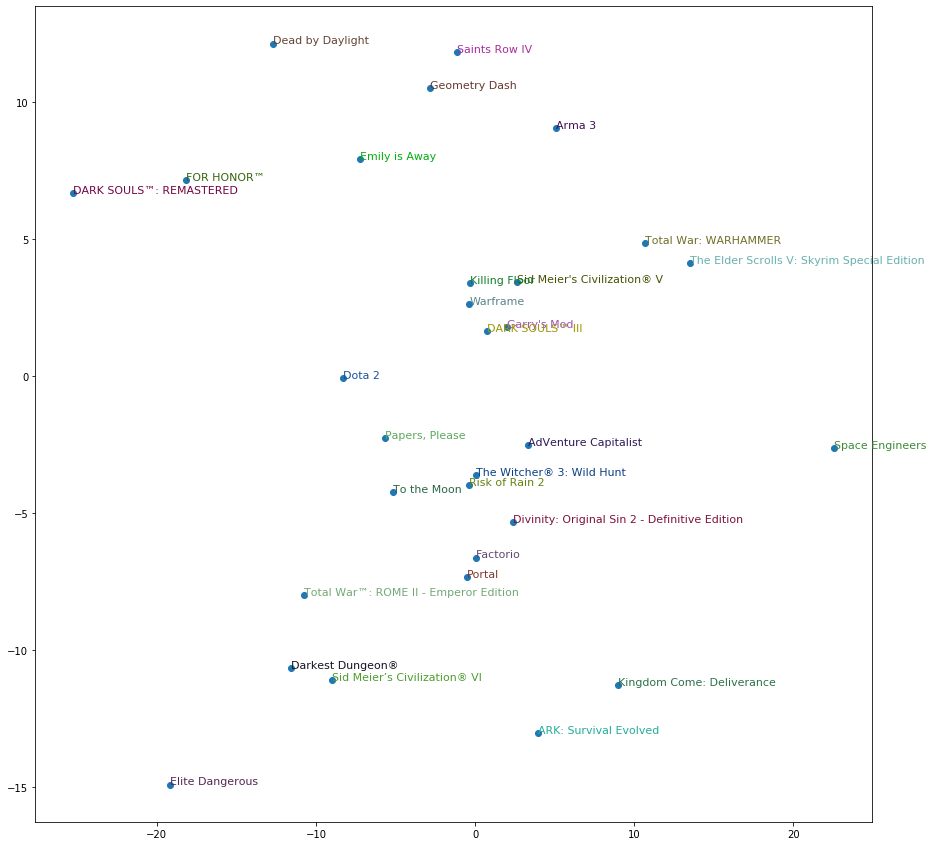

In [64]:
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(games_most_reviews[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()